In [1]:
# ============================================
# 1. Load Libraries
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# optional but useful
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)

In [3]:
# ============================================
# 2. Load Dataset
# ============================================
df = pd.read_csv("heart_disease.csv")

# Data Understanding

In [4]:
# ============================================
# 3. Basic Dataset Information
# ============================================

# First rows
print(df.head())

# Dimensions
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  Diabetes  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0       0.0           0.0     0.0      1.0                0.0            1.0          0.0      5.0      18.0      15.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0       0.0           1.0     0.0      0.0                0.0            0.0          1.0      3.0       0.0       0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0       0.0           0.0     1.0      0.0                0.0            1.0          1.0      5.0      30.0      30.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0       0.0           1.0     1.0      1.0                0.0            1.0          0.0      2.0       0.0       0.0   
4                   0.0  

In [5]:
# Column names
print(df.columns.tolist())

# Data types & structure
print(df.info())

# Summary statistics
print(df.describe(include="all").T)

['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253476 non-null  float64
 1   HighBP                253452 non-null  float64
 2   HighChol              253467 non-null  float64
 3   CholCheck             253467 non-null  float64
 4   BMI                   253470 non-null  float64
 5   Smoker                253445 non-null  float64
 6   Stroke                253482 non-null  float64
 7   Diabetes              253457 non-null  float64
 8   PhysActivity          253464 non-null  float64
 9   Fruits                253466 non-null  

In [6]:
# ============================================
# 4. Missing Value Check
# ============================================

print("\nMissing values per column:")
print(df.isna().sum())

print("\nTotal missing values:", df.isna().sum().sum())


Missing values per column:
HeartDiseaseorAttack    204
HighBP                  228
HighChol                213
CholCheck               213
BMI                     210
Smoker                  235
Stroke                  198
Diabetes                223
PhysActivity            216
Fruits                  214
Veggies                 220
HvyAlcoholConsump       220
AnyHealthcare           225
NoDocbcCost             229
GenHlth                 213
MentHlth                216
PhysHlth                203
DiffWalk                231
Sex                     230
Age                     212
Education               211
Income                  228
dtype: int64

Total missing values: 4792


In [7]:
# ============================================
# 5. Duplicate Row Check
# ============================================

num_dups = df.duplicated().sum()
print("\nNumber of duplicate rows:", num_dups)


Number of duplicate rows: 23697


In [8]:
# ============================================
# 6. Identify Numeric & Categorical Variables
# ============================================

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nNumeric Columns:\n", numeric_cols)
print("\nCategorical Columns:\n", categorical_cols)



Numeric Columns:
 ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Categorical Columns:
 []


In [9]:
# ============================================
# 7. Distribution of Key Variables
# ============================================

# Heart disease count
print("\nHeartDiseaseorAttack counts:")
print(df["HeartDiseaseorAttack"].value_counts())

# Proportion
print("\nProportion:")
print(df["HeartDiseaseorAttack"].value_counts(normalize=True))



HeartDiseaseorAttack counts:
HeartDiseaseorAttack
0.0    229602
1.0     23874
Name: count, dtype: int64

Proportion:
HeartDiseaseorAttack
0.0    0.905814
1.0    0.094186
Name: proportion, dtype: float64



BMI Summary:
count    253470.000000
mean         28.382467
std           6.609107
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64


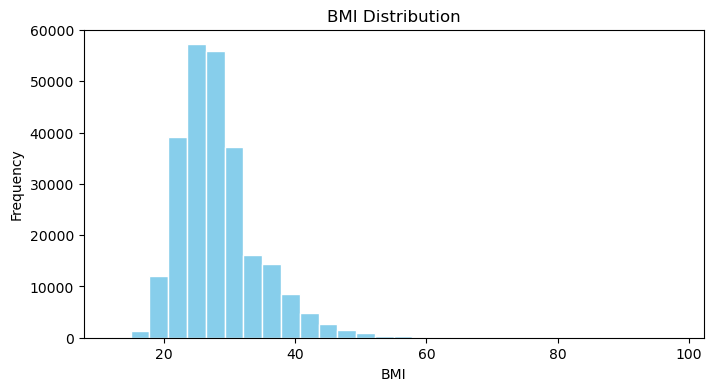

In [10]:
# BMI statistics
print("\nBMI Summary:")
print(df["BMI"].describe())

# BMI histogram
plt.figure(figsize=(8,4))
plt.hist(df["BMI"], bins=30, color="skyblue", edgecolor="white")
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()


# Data Preprocessing

In [11]:
df_clean = df.copy()

# Missing Value Handling
print("\nRows before dropping missing values:", df_clean.shape[0])
print(df_clean.isna().sum())

rows_with_na = df_clean.isna().any(axis=1).sum()
print("\nRows containing at least one missing value:", rows_with_na)

df_clean = df_clean.dropna()
print("Rows after dropping missing values:", df_clean.shape[0])



Rows before dropping missing values: 253680
HeartDiseaseorAttack    204
HighBP                  228
HighChol                213
CholCheck               213
BMI                     210
Smoker                  235
Stroke                  198
Diabetes                223
PhysActivity            216
Fruits                  214
Veggies                 220
HvyAlcoholConsump       220
AnyHealthcare           225
NoDocbcCost             229
GenHlth                 213
MentHlth                216
PhysHlth                203
DiffWalk                231
Sex                     230
Age                     212
Education               211
Income                  228
dtype: int64

Rows containing at least one missing value: 1358
Rows after dropping missing values: 252322


In [12]:
# Remove Duplicate Rows

dup_n = df_clean.duplicated().sum()
print("\nDuplicate rows:", dup_n)

df_clean = df_clean.drop_duplicates()
print("Rows after removing duplicates:", df_clean.shape[0])


Duplicate rows: 23697
Rows after removing duplicates: 228625


In [13]:
# Handle Outliers for BMI (Winsorize 1–99 percentile)

bmi_q_low = df_clean["BMI"].quantile(0.01)
bmi_q_high = df_clean["BMI"].quantile(0.99)

df_clean["BMI_capped"] = df_clean["BMI"].clip(lower=bmi_q_low, upper=bmi_q_high)

print("\nBMI_capped summary:")
print(df_clean["BMI_capped"].describe())


BMI_capped summary:
count    228625.000000
mean         28.578515
std           6.170311
min          18.000000
25%          24.000000
50%          27.000000
75%          32.000000
max          50.000000
Name: BMI_capped, dtype: float64


In [14]:
# Recode GenHlth → Ordered Factor

genhlth_map = {
    1: "Excellent",
    2: "Very Good",
    3: "Good",
    4: "Fair",
    5: "Poor"
}

df_clean["GenHlth_Factor"] = df_clean["GenHlth"].map(genhlth_map)
df_clean["GenHlth_Factor"] = pd.Categorical(
    df_clean["GenHlth_Factor"],
    categories=["Excellent", "Very Good", "Good", "Fair", "Poor"],
    ordered=True
)

In [15]:
# Validate MentHlth & PhysHlth ranges (0–30)

invalid_ment = (df_clean["MentHlth"] > 30).sum()
invalid_phys = (df_clean["PhysHlth"] > 30).sum()

print("Rows with MentHlth > 30:", invalid_ment)
print("Rows with PhysHlth > 30:", invalid_phys)

invalid_total = ((df_clean["MentHlth"] > 30) | 
                 (df_clean["PhysHlth"] > 30)).sum()

print("Total invalid rows:", invalid_total)

df_clean = df_clean[(df_clean["MentHlth"] <= 30) &
                    (df_clean["PhysHlth"] <= 30)]

Rows with MentHlth > 30: 0
Rows with PhysHlth > 30: 0
Total invalid rows: 0


In [16]:
# BMI Category (cut)

df_clean["BMI_Category"] = pd.cut(
    df_clean["BMI"],
    bins=[-np.inf, 18.5, 25, 30, np.inf],
    labels=["Underweight", "Normal", "Overweight", "Obese"]
)

print(df_clean[["BMI", "BMI_Category"]].head(10))

    BMI BMI_Category
0  40.0        Obese
1  25.0       Normal
2  28.0   Overweight
3  27.0   Overweight
4  24.0       Normal
5  25.0       Normal
6  30.0   Overweight
7  25.0       Normal
8  30.0   Overweight
9  24.0       Normal


In [17]:
# AgeGroup (mapping 1–13 → age ranges)

df_clean["Age"] = df_clean["Age"].astype(int)

age_labels = [
    "18-24", "25-29", "30-34", "35-39", "40-44",
    "45-49", "50-54", "55-59", "60-64",
    "65-69", "70-74", "75-79", "80+"
]

df_clean["AgeGroup"] = pd.Categorical(
    df_clean["Age"].apply(lambda x: age_labels[x - 1]),
    categories=age_labels,
    ordered=True
)

print(df_clean[["Age", "AgeGroup"]].head(10))

   Age AgeGroup
0    9    60-64
1    7    50-54
2    9    60-64
3   11    70-74
4   11    70-74
5   10    65-69
6    9    60-64
7   11    70-74
8    9    60-64
9    8    55-59


In [18]:
# AgeBand (broader groups)

def map_ageband(code):
    if code <= 3:
        return "18-34"
    elif code <= 6:
        return "35-49"
    elif code <= 9:
        return "50-64"
    elif code <= 11:
        return "65-74"
    else:
        return "75+"

df_clean["AgeBand"] = df_clean["Age"].apply(map_ageband)
df_clean["AgeBand"] = pd.Categorical(
    df_clean["AgeBand"],
    categories=["18-34", "35-49", "50-64", "65-74", "75+"],
    ordered=True
)

print(df_clean[["Age", "AgeBand"]].head(10))


   Age AgeBand
0    9   50-64
1    7   50-64
2    9   50-64
3   11   65-74
4   11   65-74
5   10   65-74
6    9   50-64
7   11   65-74
8    9   50-64
9    8   50-64


In [19]:
# Lifestyle Risk Score

df_clean["RiskScore"] = (
      df_clean["Smoker"].astype(int)
    + df_clean["HvyAlcoholConsump"].astype(int)
    + (1 - df_clean["PhysActivity"].astype(int))
    + (1 - df_clean["Fruits"].astype(int))
    + (1 - df_clean["Veggies"].astype(int))
)

print(df_clean[["Smoker", "HvyAlcoholConsump", "PhysActivity", 
                "Fruits", "Veggies", "RiskScore"]].head())


   Smoker  HvyAlcoholConsump  PhysActivity  Fruits  Veggies  RiskScore
0     1.0                0.0           0.0     0.0      1.0          3
1     1.0                0.0           1.0     0.0      0.0          3
2     0.0                0.0           0.0     1.0      0.0          2
3     0.0                0.0           1.0     1.0      1.0          0
4     0.0                0.0           1.0     1.0      1.0          0


In [20]:
# Disease Burden Index

df_clean["DiseaseCount"] = (
      df_clean["HighBP"].astype(int)
    + df_clean["HighChol"].astype(int)
    + df_clean["Diabetes"].astype(int)
    + df_clean["Stroke"].astype(int)
)

print(df_clean[["HighBP", "HighChol", "Diabetes", "Stroke", 
                "DiseaseCount"]].head())


   HighBP  HighChol  Diabetes  Stroke  DiseaseCount
0     1.0       1.0       0.0     0.0             2
1     0.0       0.0       0.0     0.0             0
2     1.0       1.0       0.0     0.0             2
3     1.0       0.0       0.0     0.0             1
4     1.0       1.0       0.0     0.0             2


In [21]:
# Health Stress Index

df_clean["HealthStressIndex"] = df_clean["MentHlth"] + df_clean["PhysHlth"]

print(df_clean[["MentHlth", "PhysHlth", "HealthStressIndex"]].head())

   MentHlth  PhysHlth  HealthStressIndex
0      18.0      15.0               33.0
1       0.0       0.0                0.0
2      30.0      30.0               60.0
3       0.0       0.0                0.0
4       3.0       0.0                3.0


In [22]:
# Healthcare Access Score

df_clean["HealthcareScore"] = (
    df_clean["AnyHealthcare"].astype(int)
    + (1 - df_clean["NoDocbcCost"].astype(int))
)

print(df_clean[["AnyHealthcare", "NoDocbcCost", "HealthcareScore"]].head())


   AnyHealthcare  NoDocbcCost  HealthcareScore
0            1.0          0.0                2
1            0.0          1.0                0
2            1.0          1.0                1
3            1.0          0.0                2
4            1.0          0.0                2


In [23]:
# Obesity Indicator

df_clean["ObeseFlag"] = (df_clean["BMI"] >= 30).astype(int)

print(df_clean[["BMI", "ObeseFlag"]].head())

    BMI  ObeseFlag
0  40.0          1
1  25.0          0
2  28.0          0
3  27.0          0
4  24.0          0


In [24]:
# 8.14 Lifestyle Profile Category

def map_lifestyle(x):
    if x <= 1:
        return "Healthy"
    elif x <= 3:
        return "ModerateRisk"
    else:
        return "HighRisk"

df_clean["LifestyleProfile"] = df_clean["RiskScore"].apply(map_lifestyle)

print(df_clean[["RiskScore", "LifestyleProfile"]].head())


   RiskScore LifestyleProfile
0          3     ModerateRisk
1          3     ModerateRisk
2          2     ModerateRisk
3          0          Healthy
4          0          Healthy


In [26]:
df_clean.to_csv("heart_disease_cleaned.csv", index=False)

# EDA

# FEATURE ENGINEERING

In [25]:
import numpy as np
import pandas as pd

# -------------------------------------------------------------------
# ASSUMPTION:
# df_clean already exists from your preprocessing (Part 1)
# and contains all engineered features:
#   AgeGroup, AgeBand, RiskScore, DiseaseCount, HealthStressIndex,
#   HealthcareScore, ObeseFlag, LifestyleProfile, etc.
# -------------------------------------------------------------------

# Just in case: ensure Age is integer (for AgeGroup/AgeBand logic)
df_clean["Age"] = df_clean["Age"].astype(int)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from bayes_opt import BayesianOptimization
import numpy as np
import pandas as pd

# =============================================================================
# 1. FEATURES & TARGET FROM PREPROCESSED df_clean
# =============================================================================

feature_cols = [
    "Age", "AgeGroup", "AgeBand",
    "Sex",
    "HighBP", "HighChol", "Diabetes", "Stroke",
    "Smoker", "PhysActivity",
    "PhysHlth", "MentHlth", "HealthStressIndex",
    "DiseaseCount", "ObeseFlag",
    "RiskScore", "LifestyleProfile",
    "BMI"
]

target_col = "HeartDiseaseorAttack"

X = df_clean[feature_cols].copy()
y = df_clean[target_col].copy()

# Identify categorical columns for one-hot encoding
categorical_cols = ["AgeGroup", "AgeBand", "LifestyleProfile"]
numeric_cols = [c for c in X.columns if c not in categorical_cols]

print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)

Categorical columns: ['AgeGroup', 'AgeBand', 'LifestyleProfile']
Numeric columns: ['Age', 'Sex', 'HighBP', 'HighChol', 'Diabetes', 'Stroke', 'Smoker', 'PhysActivity', 'PhysHlth', 'MentHlth', 'HealthStressIndex', 'DiseaseCount', 'ObeseFlag', 'RiskScore', 'BMI']


In [26]:
# =============================================================================
# 2. Train / Validation / Test Split (80/20 then 50/50)
# =============================================================================

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.20,
    random_state=123,
    stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=123,
    stratify=y_temp
)

print("\nShapes:")
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)



Shapes:
X_train: (182900, 18)
X_val: (22862, 18)
X_test: (22863, 18)


In [27]:
# =============================================================================
# 3. Preprocessing Pipeline (OneHot + Scaling)
# =============================================================================

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# Fit ONLY on training data
preprocessor.fit(X_train)

# Transform all datasets
X_train_enc = preprocessor.transform(X_train)
X_val_enc   = preprocessor.transform(X_val)
X_test_enc  = preprocessor.transform(X_test)

print("\nEncoded train shape:", X_train_enc.shape)


# =============================================================================
# 4. APPLY SMOTE (ONLY on training)
# =============================================================================

sm = SMOTE(random_state=123)
X_train_smote, y_train_smote = sm.fit_resample(X_train_enc, y_train)

print("\nAfter SMOTE:", np.bincount(y_train_smote))


Encoded train shape: (182900, 36)

After SMOTE: [164027 164027]


# MODELLING

## LightGBM

In [28]:
# =============================================================================
# 5. Bayesian Optimization for LightGBM
# =============================================================================

def lgb_eval(learning_rate, num_leaves, feature_fraction, bagging_fraction, min_child_samples):
    model = LGBMClassifier(
        learning_rate=learning_rate,
        num_leaves=int(num_leaves),
        feature_fraction=feature_fraction,
        bagging_fraction=bagging_fraction,
        min_child_samples=int(min_child_samples),
        n_estimators=400,
        random_state=123,
        n_jobs=-1
    )

    model.fit(X_train_smote, y_train_smote)
    pred_prob = model.predict_proba(X_val_enc)[:, 1]
    auc = roc_auc_score(y_val, pred_prob)

    return auc

params_bounds = {
    "learning_rate": (0.01, 0.2),
    "num_leaves": (20, 80),
    "feature_fraction": (0.6, 1.0),
    "bagging_fraction": (0.6, 1.0),
    "min_child_samples": (10, 60)
}

optimizer = BayesianOptimization(
    f=lgb_eval,
    pbounds=params_bounds,
    random_state=123,
    verbose=2
)

print("\nRunning Bayesian Optimization...\n")
optimizer.maximize(init_points=8, n_iter=20)

best_params = optimizer.max["params"]
best_params["num_leaves"] = int(best_params["num_leaves"])
best_params["min_child_samples"] = int(best_params["min_child_samples"])

print("\nBest params:", best_params)


# =============================================================================
# 6. Train Final LightGBM on SMOTE data
# =============================================================================

final_model = LGBMClassifier(
    n_estimators=600,
    random_state=123,
    n_jobs=-1,
    **best_params
)

final_model.fit(X_train_smote, y_train_smote)


Running Bayesian Optimization...

|   iter    |  target   | learni... | num_le... | featur... | baggin... | min_ch... |
-------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.6907405814256813, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6907405814256813
[LightGBM] [Warning] bagging_fraction is set=0.8205259076331565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8205259076331565
[LightGBM] [Warning] feature_fraction is set=0.6907405814256813, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6907405814256813
[LightGBM] [Warning] bagging_fraction is set=0.8205259076331565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8205259076331565
[LightGBM] [Info] Number of positive: 164027, number of negative: 164027
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027505 seconds.
You can set `f

LGBMClassifier(bagging_fraction=0.6, feature_fraction=0.6, learning_rate=0.01,
               min_child_samples=10, n_estimators=600, n_jobs=-1, num_leaves=57,
               random_state=123)

In [29]:
# =============================================================================
# 7. Evaluate on TEST SET
# =============================================================================

pred_prob = final_model.predict_proba(X_test_enc)[:, 1]
pred = (pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test, pred)
prec = precision_score(y_test, pred)
rec = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
cm = confusion_matrix(y_test, pred)

print("\n================ FINAL LIGHTGBM RESULTS ================")
print("Confusion Matrix:\n", cm)
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6

================ FINAL LIGHTGBM RESULTS ================
Confusion Matrix:
 [[19126  1378]
 [ 1627   732]]
Accuracy : 0.8686
Precision: 0.3469
Recall   : 0.3103
F1 Score : 0.3276
AUC      : 0.6215


## xgboost

In [30]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, confusion_matrix
)
from scipy.stats import uniform, randint
import numpy as np

print("\n=========== XGBOOST CLASSIFICATION (RANDOMIZED SEARCH CV) ===========\n")

# ========================================================================
# Compute scale_pos_weight (imbalance handling)
# ========================================================================
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print("scale_pos_weight:", scale_pos_weight)

# ========================================================================
# DEFINE PARAMETER DISTRIBUTIONS (professional approach)
# ========================================================================
param_dist = {
    "eta": uniform(0.01, 0.19),              # learning rate
    "max_depth": randint(3, 11),
    "min_child_weight": randint(1, 21),
    "subsample": uniform(0.6, 0.4),
    "colsample_bytree": uniform(0.6, 0.4),
    "gamma": uniform(0, 0.3),
}

# ========================================================================
# BUILD BASE MODEL
# ========================================================================
xgb_model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    tree_method="hist",
    n_estimators=400,
    scale_pos_weight=scale_pos_weight,
    random_state=123,
    n_jobs=-1
)
# ========================================================================
# RANDOMIZED SEARCH CV
# ========================================================================
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,                  # number of random combinations to try
    scoring="roc_auc",
    cv=3,
    verbose=2,
    random_state=123,
    n_jobs=-1
)

print("Running RandomizedSearchCV...\n")

random_search.fit(X_train_enc, y_train)

# Best parameters
best_params = random_search.best_params_
print("\nBest Parameters Found:")
print(best_params)

print("\nBest CV AUC:", random_search.best_score_)

# ========================================================================
# TRAIN FINAL MODEL WITH BEST PARAMS
# ========================================================================
final_xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    tree_method="hist",
    n_estimators=600,
    scale_pos_weight=scale_pos_weight,
    random_state=123,
    n_jobs=-1,
    **best_params
)

final_xgb.fit(X_train_enc, y_train)


=========== XGBOOST CLASSIFICATION (RANDOMIZED SEARCH CV) ===========

scale_pos_weight: 8.691093095957187
Running RandomizedSearchCV...

Fitting 3 folds for each of 30 candidates, totalling 90 fits

Best Parameters Found:
{'colsample_bytree': 0.7447154622489256, 'eta': 0.05337001386700157, 'gamma': 0.08811421391664881, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.63684197597803}

Best CV AUC: 0.8226532648969487


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7447154622489256, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.05337001386700157, eval_metric='auc', feature_types=None,
              gamma=0.08811421391664881, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=-1,
              num_parallel_tree=None, ...)

In [31]:
# ========================================================================
# MODEL EVALUATION ON TEST SET
# ========================================================================
pred_prob = final_xgb.predict_proba(X_test_enc)[:, 1]
pred = (pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test, pred)
prec = precision_score(y_test, pred)
rec = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
cm = confusion_matrix(y_test, pred)

print("\n================ FINAL XGBOOST TEST RESULTS =================")
print("Confusion Matrix:\n", cm)
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")



================ FINAL XGBOOST TEST RESULTS =================
Confusion Matrix:
 [[14391  6113]
 [  527  1832]]
Accuracy : 0.7096
Precision: 0.2306
Recall   : 0.7766
F1 Score : 0.3556
AUC      : 0.7392
